In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})

In [2]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression ='zip')
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [3]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [4]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [5]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data['day'] = events_data.date.dt.date
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [6]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


<AxesSubplot:xlabel='day'>

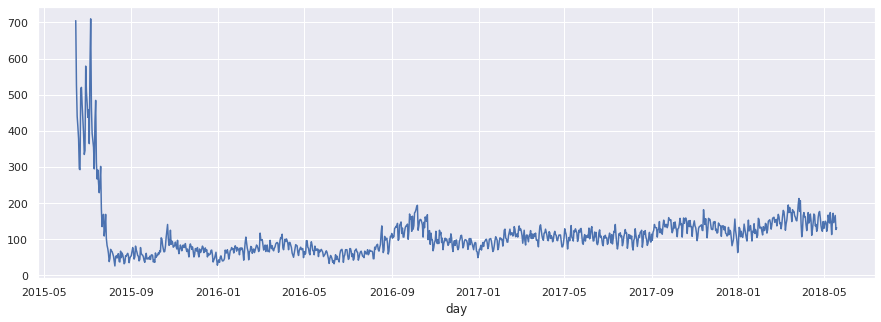

In [7]:
events_data.groupby('day').user_id.nunique().plot()

<AxesSubplot:>

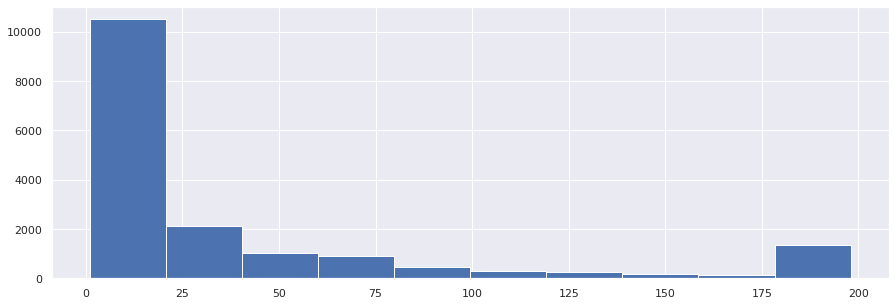

In [8]:
events_data[events_data.action=='passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id': 'passed_steps'}) \
    .passed_steps.hist()

<AxesSubplot:>

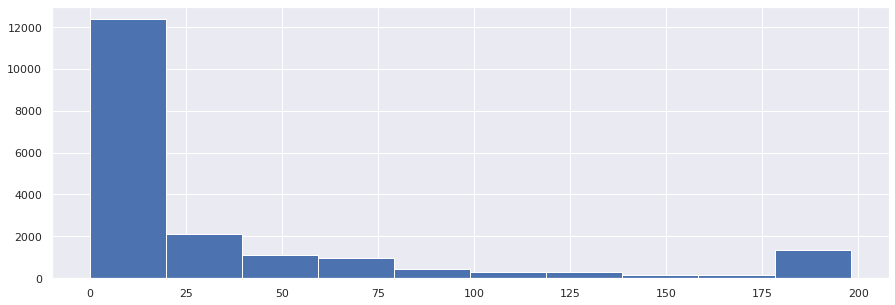

In [9]:
events_data.pivot_table(index='user_id', values='step_id', columns='action', aggfunc='count', fill_value=0) \
                        .reset_index().passed.hist()

In [10]:
users_events_data = events_data.pivot_table(index='user_id', values='step_id', columns='action', aggfunc='count', fill_value=0) \
                        .reset_index()

In [11]:
users_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [12]:
users_scores = submissions_data.pivot_table(index='user_id', values='step_id', columns='submission_status', aggfunc='count', fill_value=0) \
                        .reset_index()

In [13]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [14]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [15]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
            .groupby('user_id')['timestamp'].apply(list) \
            .apply(np.diff).values

In [16]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [17]:
gap_data = gap_data / (24*60*60)

<AxesSubplot:>

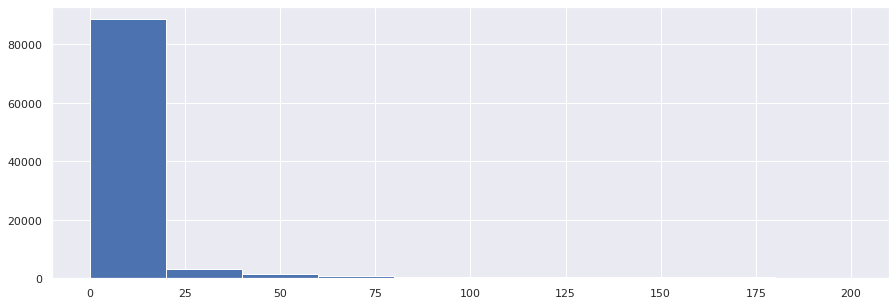

In [18]:
gap_data[gap_data<200].hist()

In [19]:
gap_data.quantile(.95)

59.760440972222156

In [20]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [21]:
submissions_data[submissions_data.submission_status=='correct'].groupby(['user_id'], as_index=False).agg({'step_id': 'count'}).sort_values(by='step_id', ascending=False)


,user_id,step_id
433,1046,421
2062,5552,186
6323,17135,168
2302,6183,142
3151,8461,135
...,...,...
2305,6191,1
2303,6184,1
2299,6166,1
5813,15771,1


In [22]:
users_data = events_data.groupby('user_id', as_index=False).agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})
users_data

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [23]:
now = 1526772811
drop_out = 2592000

In [24]:
users_data['is_gone_user'] = (now-users_data.last_timestamp)>drop_out

In [25]:
users_data.is_gone_user.value_counts()

True     17844
False     1390
Name: is_gone_user, dtype: int64

In [26]:
users_data = users_data.merge(users_scores, how='outer').fillna(0)

In [27]:
users_data = users_data.merge(users_events_data, how='outer').fillna(0)

In [28]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [29]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [30]:
users_data = users_data.merge(users_days, how='outer').fillna(0)

In [31]:
users_data['passed_course'] = users_data.passed>170

In [32]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [33]:
users_data[users_data.passed_course].day.median()

20.0

<AxesSubplot:>

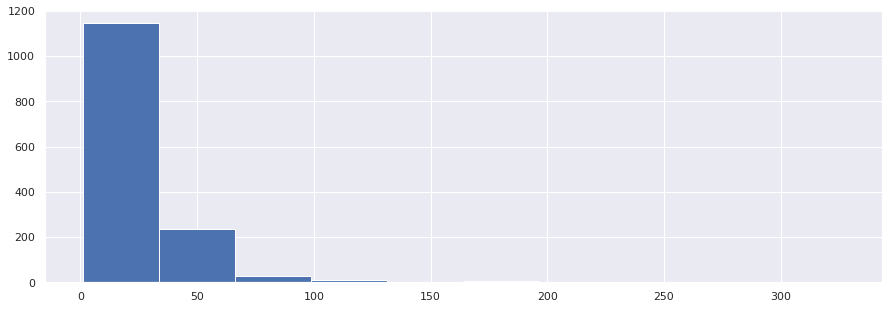

In [34]:
users_data[users_data.passed_course].day.hist()

In [35]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [36]:
users_min_time = events_data.groupby('user_id', as_index=False) \
                    .agg({'timestamp':'min'}) \
                    .rename({'timestamp': 'min_timestamp'}, axis=1)
users_min_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


In [37]:
users_data.merge(users_min_time, how='outer')

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660
...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False,1451484016
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False,1510225031
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False,1495287049
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False,1508425316


In [38]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [39]:
events_data = events_data.merge(users_min_time)

In [40]:
learning_time_threshold = 3*24*60*60

In [41]:
events_data_train = events_data[events_data.timestamp < events_data.min_timestamp+learning_time_threshold]

In [42]:
events_data_train

,step_id,timestamp,action,user_id,date,day,min_timestamp
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848
...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,1526762664
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,1526762664
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1526772750
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1526772750


In [43]:
events_data_train.groupby('user_id').day.nunique()

user_id
1        1
2        1
3        1
5        1
7        1
        ..
26790    2
26793    1
26794    3
26797    1
26798    1
Name: day, Length: 19234, dtype: int64

In [44]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [45]:
users_min_time_submissions_data = submissions_data.groupby('user_id', as_index=False) \
                    .agg({'timestamp':'min'}) \
                    .rename({'timestamp': 'min_timestamp'}, axis=1)
users_min_time_submissions_data

,user_id,min_timestamp
0,2,1514383420
1,3,1434358533
2,5,1499859650
3,8,1480603432
4,14,1436368601
...,...,...
9935,26787,1469014806
9936,26790,1451722691
9937,26794,1495290798
9938,26797,1508425367


In [46]:
submissions_data = submissions_data.merge(users_min_time_submissions_data, how='outer')

In [47]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day,min_timestamp
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,1434346056
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,1434346056
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11,1434346056
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11,1434346056
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,1434346056
...,...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05,1501946959
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18,1503059927
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25,1506348153
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06,1523035316


In [48]:
submissions_data_train = submissions_data[submissions_data.timestamp < submissions_data.min_timestamp+learning_time_threshold]
submissions_data_train

,step_id,timestamp,submission_status,user_id,date,day,min_timestamp
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15,1434346056
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15,1434346056
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15,1434346056
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15,1434346056
7,31977,1434347371,correct,15853,2015-06-15 05:49:31,2015-06-15,1434346056
...,...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05,1501946959
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18,1503059927
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25,1506348153
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06,1523035316


In [49]:
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [50]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index().rename(columns = {'day': 'days'})
X

,user_id,days
0,2,1
1,3,1
2,5,1
3,8,1
4,14,1
...,...,...
9935,26787,1
9936,26790,1
9937,26794,3
9938,26797,1


In [51]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index().rename(columns = {'step_id': 'steps_tried'})
steps_tried

,user_id,steps_tried
0,2,2
1,3,4
2,5,2
3,8,11
4,14,1
...,...,...
9935,26787,3
9936,26790,1
9937,26794,27
9938,26797,2


In [52]:
X = X.merge(steps_tried)
X

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,5,1,2
3,8,1,11
4,14,1,1
...,...,...,...
9935,26787,1,3
9936,26790,1,1
9937,26794,3,27
9938,26797,1,2


In [53]:
X = X.merge(submissions_data_train.pivot_table(index='user_id', values='step_id', columns='submission_status', aggfunc='count', fill_value=0) \
                        .reset_index())
X

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,5,1,2,2,2
3,8,1,11,9,21
4,14,1,1,0,1
...,...,...,...,...,...
9935,26787,1,3,3,0
9936,26790,1,1,1,0
9937,26794,3,27,31,9
9938,26797,1,2,2,0


In [54]:
X['correct_ratio'] = X.correct / (X.correct+X.wrong)
X

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.000000
1,3,1,4,4,4,0.500000
2,5,1,2,2,2,0.500000
3,8,1,11,9,21,0.300000
4,14,1,1,0,1,0.000000
...,...,...,...,...,...,...
9935,26787,1,3,3,0,1.000000
9936,26790,1,1,1,0,1.000000
9937,26794,3,27,31,9,0.775000
9938,26797,1,2,2,0,1.000000


In [55]:
events_data_train_viewed = events_data_train.pivot_table(index='user_id', values='step_id', columns='action', aggfunc='count', fill_value=0) \
                        .reset_index()[['user_id', 'viewed']]

In [56]:
X = X.merge(events_data_train_viewed, how='outer')

In [57]:
X = X.fillna(0)

In [58]:
X = X.merge(users_data[['user_id', 'is_gone_user', 'passed_course']], how='outer')

In [59]:
X = X[X.is_gone_user | X.passed_course]

In [60]:
y = X.passed_course.map(int)

In [61]:
y.value_counts()

0    16560
1     1425
Name: passed_course, dtype: int64

In [62]:
X = X.drop(['passed_course', 'is_gone_user'], axis=1)

In [63]:
X = X.set_index(X.user_id)
X = X.drop('user_id', axis=1)

In [64]:
X

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.0,9
3,1.0,4.0,4.0,4.0,0.5,20
5,1.0,2.0,2.0,2.0,0.5,1
8,1.0,11.0,9.0,21.0,0.3,154
14,1.0,1.0,0.0,1.0,0.0,9
...,...,...,...,...,...,...
26773,0.0,0.0,0.0,0.0,0.0,1
26774,0.0,0.0,0.0,0.0,0.0,1
26788,0.0,0.0,0.0,0.0,0.0,1
